In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///C:/Users/lukeb/sqlalchemy-challenge/SurfsUp/Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


C:\Users\lukeb\AppData\Local\Temp\ipykernel_30264\3559592862.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [28]:
# View all of the classes that automap found
all_classes = Base.classes.keys()

print("All Classes:")
for class_name in all_classes:
    print(class_name)

All Classes:
station
measurement


In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
# Find the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print(f"The most recent date in the data set is: {most_recent_date}")

The most recent date in the data set is: 2017-08-23


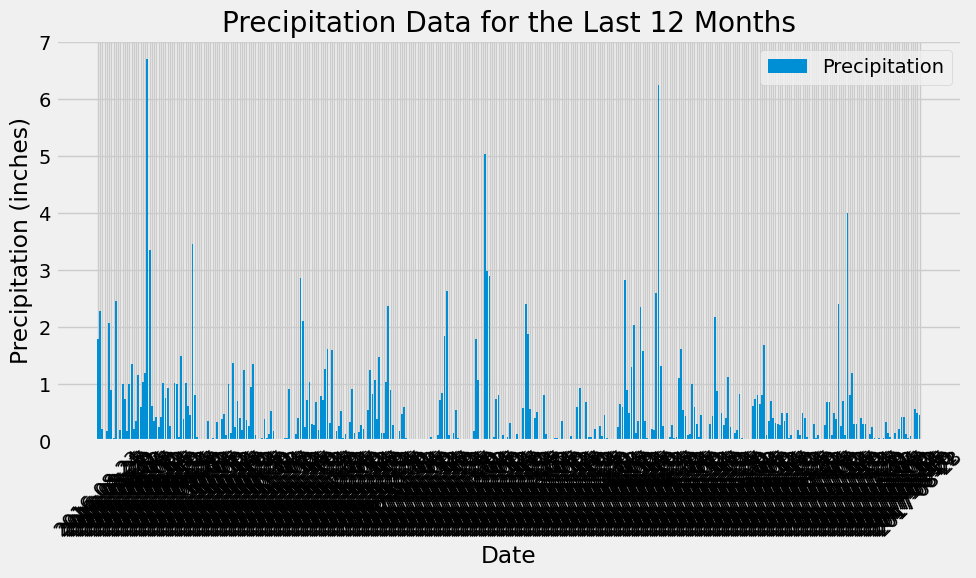

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in the dataset
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago.strftime('%Y-%m-%d'))\
    .order_by(Measurement.date)\
    .all()

# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data for the Last 12 Months')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()

# Display the summary statistics
print(summary_statistics)


       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f'The total number of stations in the dataset is: {total_stations}')

The total number of stations in the dataset is: 9


In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# List the stations and their counts in descending order.
for station, count in most_active_stations:
    print(f"Station ID: {station}, Number of Rows: {count}")

Station ID: USC00519281, Number of Rows: 2772
Station ID: USC00519397, Number of Rows: 2724
Station ID: USC00513117, Number of Rows: 2709
Station ID: USC00519523, Number of Rows: 2669
Station ID: USC00516128, Number of Rows: 2612
Station ID: USC00514830, Number of Rows: 2202
Station ID: USC00511918, Number of Rows: 1979
Station ID: USC00517948, Number of Rows: 1372
Station ID: USC00518838, Number of Rows: 511


In [42]:
# Get the most active station ID from the previous query
most_active_station_id = most_active_stations[0][0] 

# Design a query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs))\
    .filter(Measurement.station == most_active_station_id)\
    .all()

# Display the temperature statistics
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"For the most active station (Station ID: {most_active_station_id}):")
print(f"Lowest Temperature: {lowest_temp} °F")
print(f"Highest Temperature: {highest_temp} °F")
print(f"Average Temperature: {avg_temp:.2f} °F")

For the most active station (Station ID: USC00519281):
Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66 °F


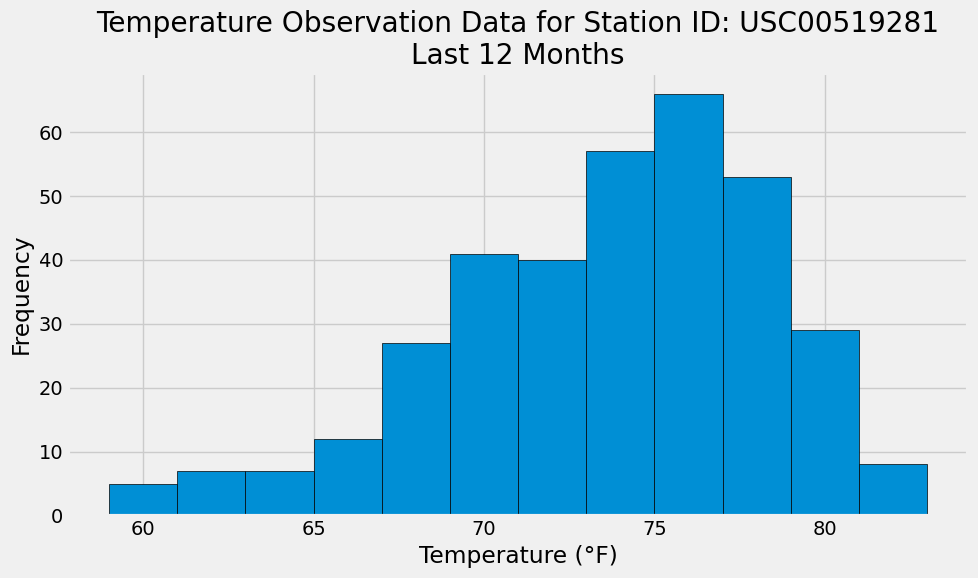

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Convert one_year_ago to string
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago_str)\
    .all()

# Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data for Station ID: {most_active_station_id}\nLast 12 Months')
plt.tight_layout()
plt.show()

# Close Session

In [48]:
# Close Session
session.close()